<a href="https://colab.research.google.com/github/urmila-24/ML-Assignments/blob/main/201951164_URMILA_RATHORE_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612/652, CS/IT 308 Machine Learning </center>
## <center> Lab#4 MMSE, Linear regression, and Logistic regression</center>

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import misc
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 

## <font color='blue'> MMSE

---

Refer class note



## <font color='red'> 1. Find the minimum mean squared error (MMSE) on following data.

In [7]:
y = [11,20,19,17,10]
y_bar = [12,18,19.5,18,9]

#write code here
y = [(y[i]-y_bar[i])**2 for i in range(0, 5)]

y_rand = {i:y.count(i) for i in y}

MSE = 0
for i in y_rand:
  MSE += i*(y_rand[i]/5)
print ("The Mean Square Error is: " , MSE)

The Mean Square Error is:  1.45


## <font color='red'> 2 Given a sample space $S_{XY}={(0,0),(1,1),(2,2),(2,3)}$, with equiprobable outcomes, i.e., $p(0,0)=p(1,1)=p(2,2)=p(2,3)=\frac{1}{4}$. Estimate $\hat{Y}$ given X.


$$\hat{Y}=E(Y)+\frac{COV(X,Y)}{VAR(X)}(X-E(X))$$

Also calculate the mean squared error between $\hat{Y}$ and $Y$.


Hint: You can use the classnotes for help.

In [8]:
#write code here
def estimated_y(e_y, e_x, var_x, cov_xy, x):
  return e_y + (cov_xy / var_x)*(x - e_x)


In [9]:
sample = np.array([[0, 0], [1, 1], [2, 2], [2, 3]])
n = sample.shape[0]
e_x = sample[:, 0].sum() / n
e_y = sample[:, 1].sum() / n
e_x2 = np.square(sample[:, 0]).sum() / n
var_x = e_x2 - (e_x)**2
e_xy = (sample[:, 0]*sample[:, 1]).sum() / n
cov_xy = e_xy - (e_x * e_y)
y_ = estimated_y(e_y, e_x, var_x, cov_xy, sample[:, 0])
print("estimated y for given x", y_)

estimated y for given x [-0.09090909  1.18181818  2.45454545  2.45454545]


In [10]:
mse = (np.square(sample[:, 1] - y_)).sum() / n
mse

0.13636363636363635

## <font color='blue'> Linear regression

---

Refer class note



## <font color='red'> 3. Perform linear regression on the given dataset and observe underfitting and overfitting capacity of the function.

In [11]:
#example of dataset:

no_samples = 10

n = np.random.rand(no_samples) # Here data is zero mean
print("n = ", n)
#Generate x between 0 and 2 using number of smaples
# x = np.random.rand(no_samples) * 2
x = np.arange(start=0, stop=2.1, step=2/(no_samples-1))
print("x = ", x)
#Generate function y dependent on x and n: y = x**2+2*n
def generate_y(x, n):
  return x**2 + 2*n

y = generate_y(x, n)
print("y = ", y)


n =  [0.53901008 0.77203235 0.28068606 0.13696221 0.07665191 0.59592353
 0.62541673 0.36558545 0.24401747 0.45254101]
x =  [0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]
y =  [1.07802016 1.59344741 0.75890298 0.71836887 0.94342727 2.42641497
 3.02861123 3.15092399 3.64852877 4.90508202]


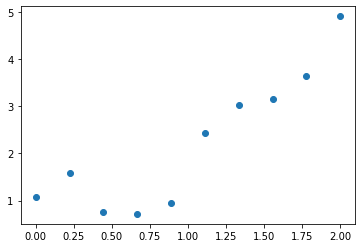

In [12]:
# code to scatter plot x and y
plt.scatter(x, y)



#### Hint: Pseudo inverse
 $$Y = W^TX$$
 $$W = (X^TX)^{-1}X^TY$$ 

1. Take $y = \theta_0 + \theta_1 x$

In [15]:
#Generate X1 by concatinating ones and x as shown in output
x1 = np.zeros([no_samples, 2])
x1[:, 0] = np.ones(no_samples)
x1[:, 1] = x

#Find W1 using pseudo inverse
w1 = np.linalg.inv(x1.T @ x1) @ x1.T @ y
print(x1)
print(w1)


[[1.         0.        ]
 [1.         0.22222222]
 [1.         0.44444444]
 [1.         0.66666667]
 [1.         0.88888889]
 [1.         1.11111111]
 [1.         1.33333333]
 [1.         1.55555556]
 [1.         1.77777778]
 [1.         2.        ]]
[0.33781969 1.88735307]


2. Take $y = \theta_0 + \theta_1 x + \theta_2 x^2 +\theta_3 x^3 +\theta_4 x^4+\theta_5 x^5$

In [16]:
#Generate X2 by concatinating ones,x,x**2,x**3,x**4,x**5 
X2 = np.zeros([no_samples, 6])
X2[:, 0] = np.ones(no_samples)
X2[:, 1] = x
X2[:, 2] = x**2
X2[:, 3] = x**3
X2[:, 4] = x**4
X2[:, 5] = x**5

W2= la.inv(X2.T@X2)@X2.T@y

print(X2)
print(W2)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.22222222e-01 4.93827160e-02 1.09739369e-02
  2.43865264e-03 5.41922810e-04]
 [1.00000000e+00 4.44444444e-01 1.97530864e-01 8.77914952e-02
  3.90184423e-02 1.73415299e-02]
 [1.00000000e+00 6.66666667e-01 4.44444444e-01 2.96296296e-01
  1.97530864e-01 1.31687243e-01]
 [1.00000000e+00 8.88888889e-01 7.90123457e-01 7.02331962e-01
  6.24295077e-01 5.54928957e-01]
 [1.00000000e+00 1.11111111e+00 1.23456790e+00 1.37174211e+00
  1.52415790e+00 1.69350878e+00]
 [1.00000000e+00 1.33333333e+00 1.77777778e+00 2.37037037e+00
  3.16049383e+00 4.21399177e+00]
 [1.00000000e+00 1.55555556e+00 2.41975309e+00 3.76406036e+00
  5.85520500e+00 9.10809667e+00]
 [1.00000000e+00 1.77777778e+00 3.16049383e+00 5.61865569e+00
  9.98872123e+00 1.77577266e+01]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01]]
[  1.09480343   8.58892954 -42.22204873  63.55929

3. Take $y = \theta_0 + \theta_1 x + \theta_2 x^2 $

In [17]:
#Generate X3 by concatinating ones,x,x**2 
X3 = np.zeros([no_samples, 3])
X3[:, 0] = np.ones(no_samples)
X3[:, 1] = x
X3[:, 2] = x**2

W3= la.inv(X3.T@X3)@X3.T@y

print(X3)
print(W3)


[[1.         0.         0.        ]
 [1.         0.22222222 0.04938272]
 [1.         0.44444444 0.19753086]
 [1.         0.66666667 0.44444444]
 [1.         0.88888889 0.79012346]
 [1.         1.11111111 1.2345679 ]
 [1.         1.33333333 1.77777778]
 [1.         1.55555556 2.41975309]
 [1.         1.77777778 3.16049383]
 [1.         2.         4.        ]]
[ 1.14474829 -0.83603095  1.36169201]


[0.41770442 0.87606852 1.33443261 1.79279671 2.25116081 2.7095249
 3.167889   3.6262531  4.08461719 4.54298129]
[1.11284284 0.49441603 1.14907255 1.96480259 2.45008011 2.571455
 2.59114532 2.90462939 3.87823803 5.6867467 ]
[0.95112075 1.05387396 1.24552989 1.52608855 1.89554992 2.35391402
 2.90118084 3.53735038 4.26242264 5.07639762]


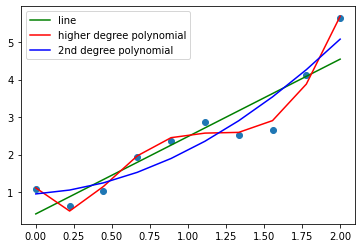

In [ ]:
fig = plt.figure()
plt.scatter(x,y)

y_p1 = x1@w1
y_p2 = X2@W2
y_p3 = X3@W3
print(y_p1)
print(y_p2)
print(y_p3)

plt.plot(x, y_p1)
plt.plot(x, y_p2)
plt.plot(x, y_p3)
#Plot x,y_p1
#plot x,y_p2
#plot x,y_p3



## <font color='blue'> Brief about **Gradient descent**:
---


Given a system $Ax=b$, we find $x$ for given observations $b$ and coeffiecient matrix $A$. When $b$ is not in column space of $A$, then $Ax \neq b$ and we need to find $x$ in such a way that $Ax \approx b$.

<br>
Linear least square is one of the methods to estimate $x$ by minimizing the mean square error as, $\min ||Ax-b||_2$. This can be written as,
        
$\underset{x}{\mathrm{argmin}}||Ax-b||_{2}^{2} = f(x)$

We need to find $x$ in such a way that $f(x)$ will be minimum in $L_2$ norm. 

<br>


We will solve this by applying gradient descent algortithm on $f(x)$. 
<br>
To apply this algorithm we need to find gradient of the function, i.e.,
<br>
              $\Delta_x f(x)= A^T(Ax-b) = A^TAx-A^Tb$

<br>


Optimisation for least-squares
<br>
$||A^TAx-A^Tb||_2>\delta$, $\delta$ is the small positive number indicating tolerance.

<br>

Now we will find new x iteratively using step size $\alpha$ to find the best fit for $AX=b$ as:

<br>
$x^{[n+1]}=x^{[n]}-\alpha (A^TAx-A^Tb)$.
<br>

We need to choose $\alpha$, $\delta$ and $x^{[0]}$ to iterate until $x^{[n+1]} \rightarrow x^{[n]}$.

##  <font color='blue'> Logistic regression

---
Cost funcion for logistic regression,
$$
\begin{aligned}
J(\theta) &=\frac{1}{m} \sum_{i=1}^{m} \cos t\left(h_{\theta}\left(x^{i}\right), y^{\prime}\right) \\
&=-\frac{1}{m}\left[\sum_{i=1}^{m} y^{i} \log h_{\theta}\left(x^{i}\right)+\left(1-y^{i}\right)\right.\log \left(1-\log \left(x^{i}\right)\right]\\
h(x)&=\frac{1}{1+e^{-\Theta^Tx}}
\end{aligned}
$$
So, using gradient descent
$$
\Theta_{i+1}=\Theta_{i}-\frac{\alpha}{m} \sum_{i=1}^{m}\left(h\left(x^{i} \Theta\right)-y^{i}\right)
$$
iterate till $$
\Theta_{i+1} \cong \Theta_{i}
$$




## <font color='red'> 4. Perform logistic regression on the dataset given below.
Here, to classify 2D data,
decision line can be given as,
$$\theta_0+\theta_1x+\theta_2y=0$$
Let, $$\Theta^T=\begin{bmatrix}
\theta_0\\
\theta_1\\
\theta_2
\end{bmatrix}$$

In [18]:
#Dataset example

X = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,1],[1,0,0],[1,1,0],[1,2,1],[1,3,1],[2,0,0],[2,1,1],[2,2,1],[2,3,1]])
Xb =X
print("x|y|class")
print(Xb)



x|y|class
[[0 0 0]
 [0 1 0]
 [0 2 0]
 [0 3 1]
 [1 0 0]
 [1 1 0]
 [1 2 1]
 [1 3 1]
 [2 0 0]
 [2 1 1]
 [2 2 1]
 [2 3 1]]


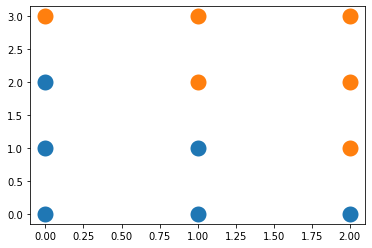

In [19]:
#Generate scatter plot of X
uq = np.unique(X[:,-1])
for i in uq:
    cl1 = X[X[:,-1]==i]
    plt.scatter(cl1[:,0], cl1[:,1],linewidth=10)

In [ ]:
# Generate X by concatinating ones and X
n = X.shape[0]
b = np.ones((n,1))
X = np.hstack((b, X))
X


In [20]:
#write code for gradient descent to find thetas
def cost(theta,X,y):
  m = len(y)
  c = (1/2*m) * np.sum(np.square((X.dot(theta))-y))  
  return c


def gradient_descent(X,y,theta,alpha,iterations):
  m = len(y)
  thetas = np.zeros((iterations,2))
  costs = np.zeros(iterations)
  for i in range(iterations):
    theta = theta - (1/m)*alpha*(X.T.dot((X.dot(theta))-y))
    # thetas[i,:] = theta.T
    costs[i] = cost(theta,X,y)
  return theta,thetas,costs

theta = np.random.randn(2,1)
theta,thetas,costs = gradient_descent(X[:, [0, 1]], X[:, 2], theta, 0.01,30)
thetas

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
plt.rc('text', usetex=True)

#pts = np.loadtxt('linpts.txt')
X = pts[:,:2]
Y = pts[:,2].astype('int')

# Fit the data to a logistic regression model.
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X, Y)


# Calculate the intercept and gradient of the decision boundary.
c = (1/2*m) * np.sum(np.square((X.dot(theta))-y)) 
m = len(y)

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 2
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X[Y==0].T, s=8, alpha=0.5)
plt.scatter(*X[Y==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()


NameError: ignored